In [4]:
# Importing the libraries 
import numpy as np
from sklearn.utils import resample 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import cross_validate 
import warnings
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from sklearn. metrics import roc_auc_score
warnings.filterwarnings("ignore", message="numpy.dtype size changed") 
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
#import io
#dataset =pd.read_csv(io. BytesIO(uploaded [ 'creditcard.csv']))

In [5]:
dataset=pd.read_csv('creditcard.csv')

Confusion matrix for Random Oversampling Logistic Regression
[[127  18]
 [ 26 129]]
AUC for Random Oversampling Logistic Regression: 0.914


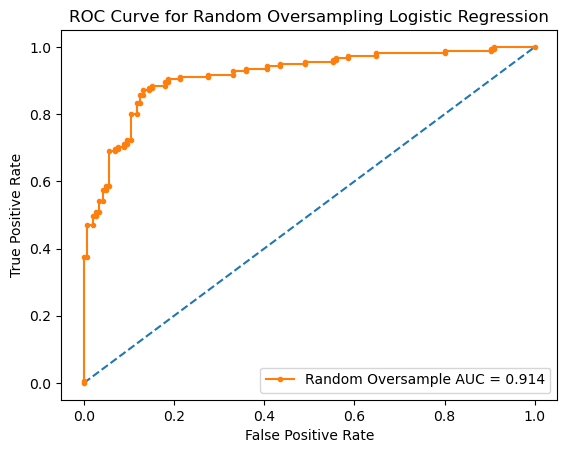

In [6]:
#1 Random Over sample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler

# Step 2: Load your dataset
# Example: Load a CSV file (adjust the path and filename as needed)
# df = pd.read_csv('path_to_your_dataset.csv')

# Replace this with your actual DataFrame
# For example, if your dataset has a target column named 'target':
# X = df.drop('target', axis=1)
# y = df['target']

# Dummy data for demonstration (remove this when using your actual data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Implement Random Oversampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Step 5: Train the Logistic Regression model on the resampled data
classifier_ros = LogisticRegression(random_state=0)
classifier_ros.fit(X_resampled, y_resampled)

# Step 6: Make predictions on the test set
y_pred_ros = classifier_ros.predict(X_test)

# Step 7: Calculate the confusion matrix
cm_ros = confusion_matrix(y_test, y_pred_ros)
print('Confusion matrix for Random Oversampling Logistic Regression') 
print(cm_ros)

# Step 8: Get predicted probabilities
probs_ros = classifier_ros.predict_proba(X_test)[:, 1]

# Step 9: Calculate AUC
auc6 = roc_auc_score(y_test, probs_ros)
print('AUC for Random Oversampling Logistic Regression: %.3f' % auc6)

# Step 10: Plot ROC curve
fpr_ros, tpr_ros, thresholds_ros = roc_curve(y_test, probs_ros)
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr_ros, tpr_ros, marker='.', label='Random Oversample AUC = %.3f' % auc6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Oversampling Logistic Regression')
plt.legend()
plt.show()


Undersampled training set shape: 0    345
1    345
Name: count, dtype: int64
Confusion matrix for Random Undersampling Logistic Regression
[[127  18]
 [ 28 127]]
AUC for Random Undersampling Logistic Regression: 0.914


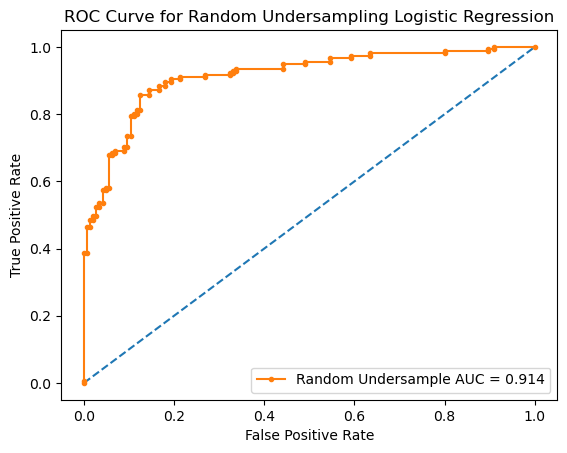

In [8]:
# 2 Random Undersampling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler

# Step 2: Load your dataset
# Example: Load a CSV file (adjust the path and filename as needed)
# df = pd.read_csv('path_to_your_dataset.csv')

# Replace this with your actual DataFrame
# For example, if your dataset has a target column named 'target':
# X = df.drop('target', axis=1)
# y = df['target']

# Dummy data for demonstration (remove this when using your actual data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Implement Random Undersampling
rus = RandomUnderSampler(random_state=0)
X_under_sampled, y_under_sampled = rus.fit_resample(X_train, y_train)

# Check class distribution after undersampling (optional)
print("Undersampled training set shape:", pd.Series(y_under_sampled).value_counts())

# Step 5: Train the Logistic Regression model on the undersampled data
classifier_rus = LogisticRegression(random_state=0)
classifier_rus.fit(X_under_sampled, y_under_sampled)

# Step 6: Make predictions on the test set
y_pred_rus = classifier_rus.predict(X_test)

# Step 7: Calculate the confusion matrix
cm_rus = confusion_matrix(y_test, y_pred_rus)
print('Confusion matrix for Random Undersampling Logistic Regression') 
print(cm_rus)

# Step 8: Get predicted probabilities
probs_rus = classifier_rus.predict_proba(X_test)[:, 1]

# Step 9: Calculate AUC
auc7 = roc_auc_score(y_test, probs_rus)
print('AUC for Random Undersampling Logistic Regression: %.3f' % auc7)

# Step 10: Plot ROC curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, probs_rus)
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr_rus, tpr_rus, marker='.', label='Random Undersample AUC = %.3f' % auc7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Undersampling Logistic Regression')
plt.legend()
plt.show()

Tomek Links undersampled training set shape: 1    345
0    330
Name: count, dtype: int64
Confusion matrix for Tomek Links Logistic Regression
[[125  20]
 [ 22 133]]
AUC for Tomek Links Logistic Regression: 0.915


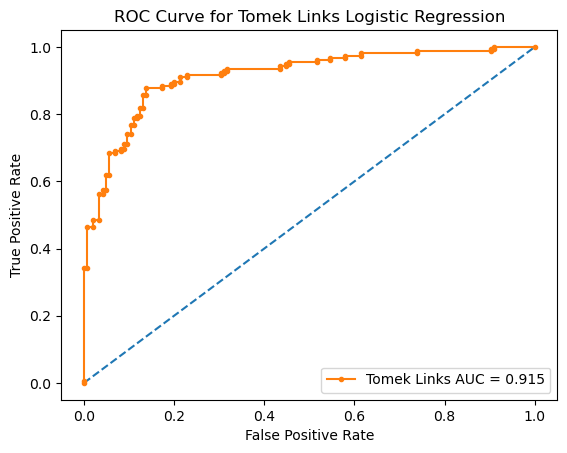

In [9]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from imblearn.under_sampling import TomekLinks

# Step 2: Load your dataset
# Example: Load a CSV file (adjust the path and filename as needed)
# df = pd.read_csv('path_to_your_dataset.csv')

# Replace this with your actual DataFrame
# For example, if your dataset has a target column named 'target':
# X = df.drop('target', axis=1)
# y = df['target']

# Dummy data for demonstration (remove this when using your actual data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Implement Tomek Links Undersampling
tl = TomekLinks()
X_tomek, y_tomek = tl.fit_resample(X_train, y_train)

# Check class distribution after Tomek Links undersampling (optional)
print("Tomek Links undersampled training set shape:", pd.Series(y_tomek).value_counts())

# Step 5: Train the Logistic Regression model on the Tomek Links undersampled data
classifier_tomek = LogisticRegression(random_state=0)
classifier_tomek.fit(X_tomek, y_tomek)

# Step 6: Make predictions on the test set
y_pred_tomek = classifier_tomek.predict(X_test)

# Step 7: Calculate the confusion matrix
cm_tomek = confusion_matrix(y_test, y_pred_tomek)
print('Confusion matrix for Tomek Links Logistic Regression') 
print(cm_tomek)

# Step 8: Get predicted probabilities
probs_tomek = classifier_tomek.predict_proba(X_test)[:, 1]

# Step 9: Calculate AUC
auc8 = roc_auc_score(y_test, probs_tomek)
print('AUC for Tomek Links Logistic Regression: %.3f' % auc8)

# Step 10: Plot ROC curve
fpr_tomek, tpr_tomek, thresholds_tomek = roc_curve(y_test, probs_tomek)
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr_tomek, tpr_tomek, marker='.', label='Tomek Links AUC = %.3f' % auc8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tomek Links Logistic Regression')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster centroids undersampled training set shape: 0    345
1    345
Name: count, dtype: int64
Confusion matrix for Cluster Centroids Logistic Regression
[[127  18]
 [ 25 130]]
AUC for Cluster Centroids Logistic Regression: 0.914


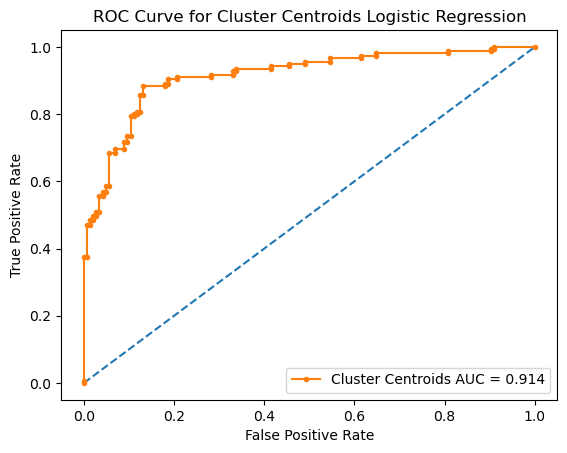

In [10]:
from imblearn.under_sampling import ClusterCentroids

# Step 4: Implement Cluster Centroids Undersampling
cc = ClusterCentroids(random_state=0)
X_centroids, y_centroids = cc.fit_resample(X_train, y_train)

# Check class distribution after Cluster Centroids undersampling (optional)
print("Cluster centroids undersampled training set shape:", pd.Series(y_centroids).value_counts())

# Step 5: Train the Logistic Regression model on the Cluster Centroids undersampled data
classifier_cc = LogisticRegression(random_state=0)
classifier_cc.fit(X_centroids, y_centroids)

# Step 6: Make predictions on the test set
y_pred_cc = classifier_cc.predict(X_test)

# Step 7: Calculate the confusion matrix
cm_cc = confusion_matrix(y_test, y_pred_cc)
print('Confusion matrix for Cluster Centroids Logistic Regression') 
print(cm_cc)

# Step 8: Get predicted probabilities
probs_cc = classifier_cc.predict_proba(X_test)[:, 1]

# Step 9: Calculate AUC
auc9 = roc_auc_score(y_test, probs_cc)
print('AUC for Cluster Centroids Logistic Regression: %.3f' % auc9)

# Step 10: Plot ROC curve
fpr_cc, tpr_cc, thresholds_cc = roc_curve(y_test, probs_cc)
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr_cc, tpr_cc, marker='.', label='Cluster Centroids AUC = %.3f' % auc9)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cluster Centroids Logistic Regression')
plt.legend()
plt.show()


SMOTE training set shape: 1    355
0    355
Name: count, dtype: int64
Confusion matrix for SMOTE Logistic Regression
[[127  18]
 [ 27 128]]
AUC for SMOTE Logistic Regression: 0.914


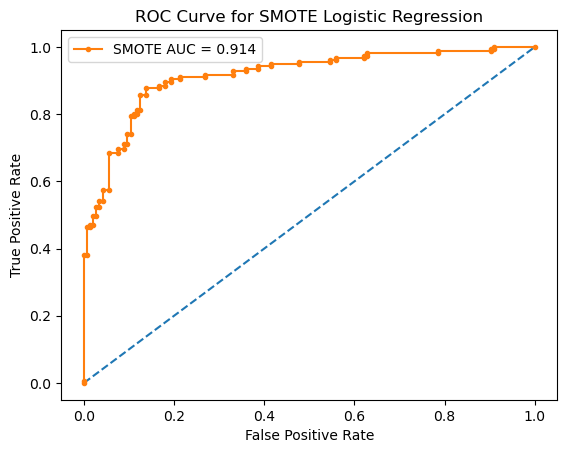

In [11]:
from imblearn.over_sampling import SMOTE

# Step 4: Implement SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE (optional)
print("SMOTE training set shape:", pd.Series(y_smote).value_counts())

# Step 5: Train the Logistic Regression model on the SMOTE data
classifier_smote = LogisticRegression(random_state=0)
classifier_smote.fit(X_smote, y_smote)

# Step 6: Make predictions on the test set
y_pred_smote = classifier_smote.predict(X_test)

# Step 7: Calculate the confusion matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
print('Confusion matrix for SMOTE Logistic Regression') 
print(cm_smote)

# Step 8: Get predicted probabilities
probs_smote = classifier_smote.predict_proba(X_test)[:, 1]

# Step 9: Calculate AUC
auc10 = roc_auc_score(y_test, probs_smote)
print('AUC for SMOTE Logistic Regression: %.3f' % auc10)

# Step 10: Plot ROC curve
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, probs_smote)
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr_smote, tpr_smote, marker='.', label='SMOTE AUC = %.3f' % auc10)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SMOTE Logistic Regression')
plt.legend()
plt.show()

SMOTE + Tomek Links training set shape: 0    355
1    330
Name: count, dtype: int64
Confusion matrix for SMOTE + Tomek Links Logistic Regression
[[130  15]
 [ 31 124]]
AUC for SMOTE + Tomek Links Logistic Regression: 0.913


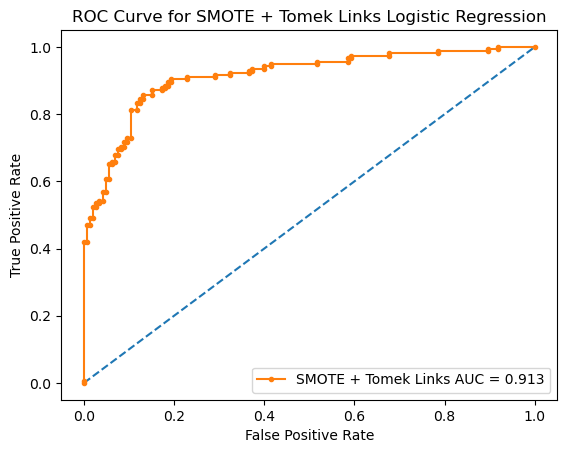

In [12]:
# Step 4: Implement SMOTE followed by Tomek Links
smote_tomek = SMOTE(random_state=0)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

# Apply Tomek Links
tl = TomekLinks()
X_smote_tomek, y_smote_tomek = tl.fit_resample(X_smote_tomek, y_smote_tomek)

# Check class distribution after SMOTE + Tomek Links (optional)
print("SMOTE + Tomek Links training set shape:", pd.Series(y_smote_tomek).value_counts())

# Step 5: Train the Logistic Regression model on the SMOTE + Tomek Links data
classifier_smote_tomek = LogisticRegression(random_state=0)
classifier_smote_tomek.fit(X_smote_tomek, y_smote_tomek)

# Step 6: Make predictions on the test set
y_pred_smote_tomek = classifier_smote_tomek.predict(X_test)

# Step 7: Calculate the confusion matrix
cm_smote_tomek = confusion_matrix(y_test, y_pred_smote_tomek)
print('Confusion matrix for SMOTE + Tomek Links Logistic Regression') 
print(cm_smote_tomek)

# Step 8: Get predicted probabilities
probs_smote_tomek = classifier_smote_tomek.predict_proba(X_test)[:, 1]

# Step 9: Calculate AUC
auc11 = roc_auc_score(y_test, probs_smote_tomek)
print('AUC for SMOTE + Tomek Links Logistic Regression: %.3f' % auc11)

# Step 10: Plot ROC curve
fpr_smote_tomek, tpr_smote_tomek, thresholds_smote_tomek = roc_curve(y_test, probs_smote_tomek)
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr_smote_tomek, tpr_smote_tomek, marker='.', label='SMOTE + Tomek Links AUC = %.3f' % auc11)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SMOTE + Tomek Links Logistic Regression')
plt.legend()
plt.show()

In [13]:
print("Accuracy comparisons")
print("-----------------------------------------")
print("Random Oversample       |  %.3f" % auc6)  # AUC from oversampling
print("Random Undersample      |  %.3f" % auc7)  # AUC for undersampling
print("Tomeklinks undersample  |  %.3f" % auc8)  # AUC for Tomek Links
# Include other AUC values as needed
print("Cluster centroids       |  %.3f" % auc9)
print("SMOTE                   |  %.3f" % auc10)
print("SMOTE+TL                |  %.3f" % auc11)

Accuracy comparisons
-----------------------------------------
Random Oversample       |  0.914
Random Undersample      |  0.914
Tomeklinks undersample  |  0.915
Cluster centroids       |  0.914
SMOTE                   |  0.914
SMOTE+TL                |  0.913
